In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
seed = 2022

import spacy
import pickle
nlp = spacy.load('en_core_web_md')

In [2]:
csv_file = "cleaned_EThOS_CSV_202210.csv"
df = pd.read_csv(csv_file, encoding="ISO-8859-2")
df.head()

/var/folders/l7/bnn1j6bs3bqfskq2jlq55yh80000gr/T/ipykernel_1378/740333908.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, encoding="ISO-8859-2")


,Unnamed: 0,Title,DOI,Author,Author ISNI,ORCID,Institution,Institution ISNI,Date,Qualification,Abstract,Subject Discipline,Supervisor(s),Funder(s),EThOS URL,IR URL
0,0,Computation and measurement of turbulent flow ...,,"Loizou, Panos A.",https://isni.org/isni/0000000136122593,,University of Manchester,https://isni.org/isni/0000000121662407,1989,Thesis (Ph.D.),,Physical Sciences,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,
1,1,Prolactin and growth hormone secretion in norm...,,"Prescott, R. W. G.",https://isni.org/isni/0000000134992122,,University of Newcastle upon Tyne,https://isni.org/isni/0000000104627212,1983,Thesis (Ph.D.),,Biological Sciences,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,
2,2,Influence of strain fields on flame propagation,,"Mendes-Lopes, J. M. C.",https://isni.org/isni/0000000133937105,,University of Cambridge,https://isni.org/isni/0000000121885934,1983,Thesis (Ph.D.),Flame propagation can be highly influenced by ...,Engineering & Technology,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,
3,3,"Connectivity, flow and transport in network mo...",,"Robinson, Peter Clive",https://isni.org/isni/0000000135292822,,University of Oxford,https://isni.org/isni/0000000419368948,1984,Thesis (Ph.D.),In order to evaluate the safety of radioactive...,Physical Sciences,"Rae, John",,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,http://ora.ox.ac.uk/objects/uuid:c61bf73b-b794...
4,4,The theory and implementation of a high qualit...,,"Lower, K. N.",https://isni.org/isni/0000000136133567,,University of Bristol,https://isni.org/isni/0000000419367603,1985,Thesis (Ph.D.),,Engineering & Technology,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,


In [3]:
# only consider the records with Subject Discipline and Abstracts
df_2 = df[(df["Subject Discipline"]!=" ") & (df["Abstract"]!= " ")]

In [4]:
len(df_2)

320527

In [5]:
# # obtain abstract embeddings
# abstract_docs = list(nlp.pipe(df_2["Abstract"], n_process=8))
# abstract_embeddings = np.array([doc.vector for doc in abstract_docs])

with open("spacy_abstract_embeddings.pkl", 'rb') as f:
    abstract_embeddings = pickle.load(f)

In [6]:
# save the embeddings for later use
with open("spacy_abstract_embeddings.pkl", 'wb') as f:
    pickle.dump(abstract_embeddings, f)

In [35]:
labels = np.array(df_2["Subject Discipline"])
subjects = sorted(list(set(labels)))
label_index = np.array([subjects.index(l) for l in labels])

In [36]:
subjects

['Agriculture & Veterinary Sciences',
 'Architecture, Building & Planning',
 'Biological Sciences',
 'Business & Administrative Studies',
 'Computer Science',
 'Creative Arts & Design',
 'Education',
 'Engineering & Technology',
 'History & Archaeology',
 'Language & Literature',
 'Law',
 'Librarianship & Information Science',
 'Mathematics & Statistics',
 'Medicine & Health',
 'Music',
 'Philosophy, Psychology & Religious Studies',
 'Physical Sciences',
 'Social, Economic & Political Studies',
 'Sport & Recreation']

In [37]:
df["Subject Discipline"].value_counts() / len(df) 

Medicine & Health                             0.158158
Physical Sciences                             0.141975
Engineering & Technology                      0.125046
Social, Economic & Political Studies          0.114082
Biological Sciences                           0.100283
                                              0.066915
Philosophy, Psychology & Religious Studies    0.049349
Language & Literature                         0.043110
History & Archaeology                         0.030861
Business & Administrative Studies             0.030350
Education                                     0.030291
Computer Science                              0.023588
Mathematics & Statistics                      0.020788
Agriculture & Veterinary Sciences             0.019547
Law                                           0.011578
Creative Arts & Design                        0.009660
Architecture, Building & Planning             0.007872
Sport & Recreation                            0.007415
Music     

In [38]:
(df[df["Subject Discipline"]!=" "]["Subject Discipline"].value_counts() 
 / sum(df["Subject Discipline"]!=" "))

Medicine & Health                             0.169500
Physical Sciences                             0.152157
Engineering & Technology                      0.134014
Social, Economic & Political Studies          0.122263
Biological Sciences                           0.107474
Philosophy, Psychology & Religious Studies    0.052887
Language & Literature                         0.046201
History & Archaeology                         0.033075
Business & Administrative Studies             0.032527
Education                                     0.032464
Computer Science                              0.025279
Mathematics & Statistics                      0.022279
Agriculture & Veterinary Sciences             0.020949
Law                                           0.012409
Creative Arts & Design                        0.010353
Architecture, Building & Planning             0.008436
Sport & Recreation                            0.007947
Music                                         0.006121
Librarians

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(abstract_embeddings,
                                                    label_index,
                                                    random_state = seed)

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrix(predictions, true, label_names):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot()
    cm = confusion_matrix(true, predictions)
    cm_display = ConfusionMatrixDisplay(cm, display_labels=label_names).plot(ax=ax,
                                                                             xticks_rotation="vertical")

## Pure random

Accuracy: 0.10401587380821645


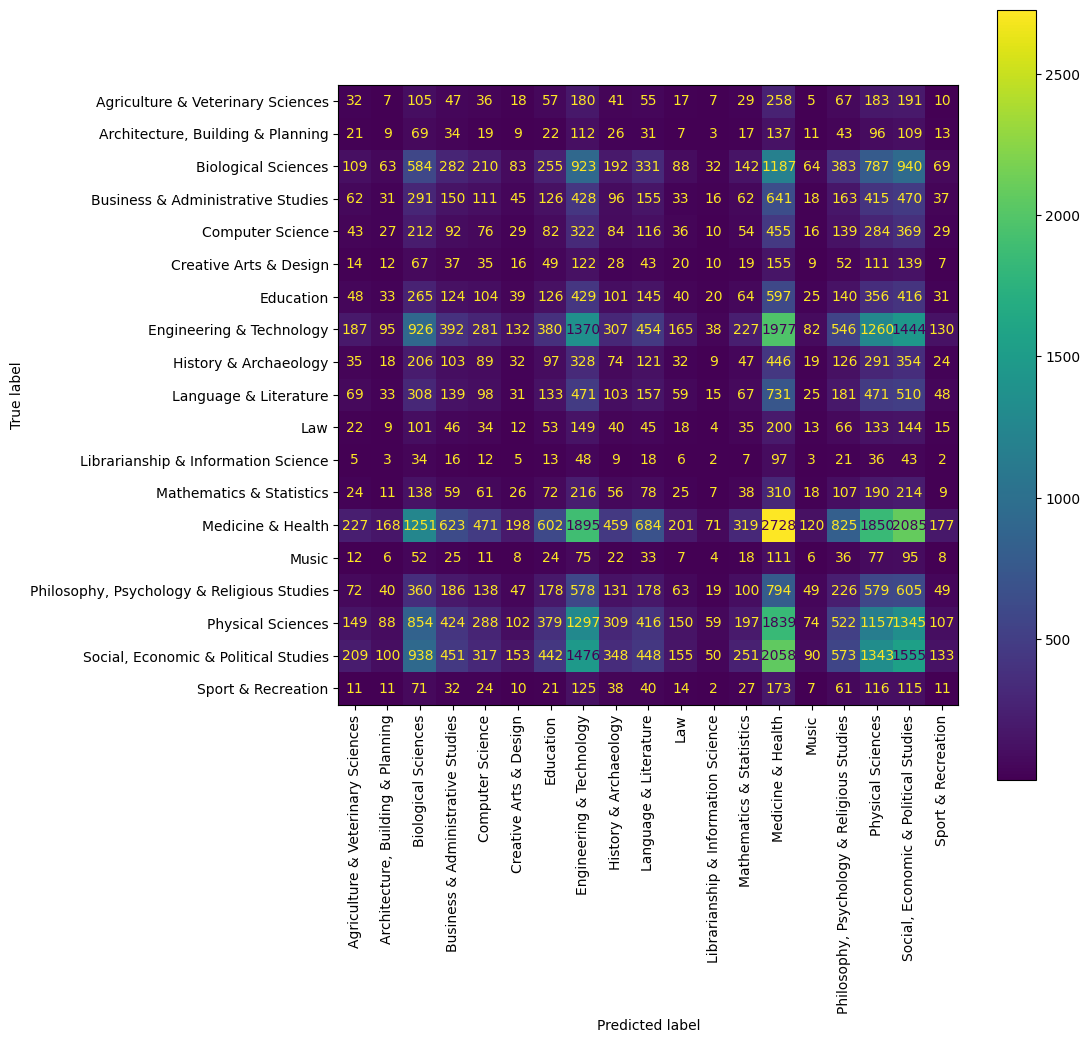

In [44]:
np.random.seed(seed)
random_predictions = np.random.choice(label_index, size = len(y_test))

# model accuracy for X_test
print(f"Accuracy: {((random_predictions == y_test).sum() / len(y_test)).item()}")

# creating a confusion matrix
plot_confusion_matrix(predictions = random_predictions,
                      true = y_test,
                      label_names = subjects)

## Decision Tree

Accuracy: 0.3921779064543503


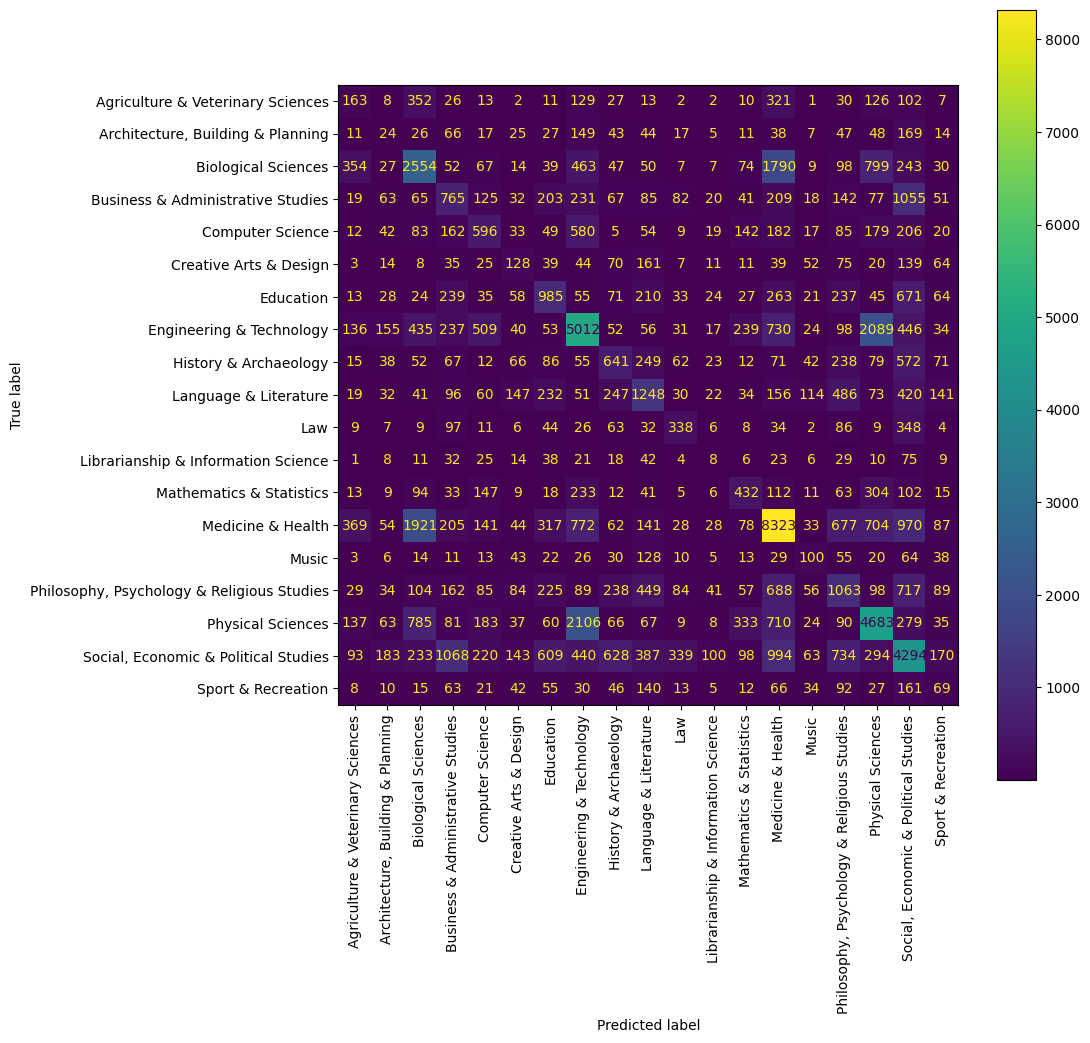

In [16]:
from sklearn.tree import DecisionTreeClassifier

# training a DescisionTreeClassifier
dtree_model = DecisionTreeClassifier().fit(X_train, y_train)

# model accuracy for X_test
print(f"Accuracy: {dtree_model.score(X_test, y_test)}")

# creating a confusion matrix
plot_confusion_matrix(predictions = dtree_model.predict(X_test),
                      true = y_test,
                      label_names = subjects)

## SVM

Accuracy: 0.6710926970498677


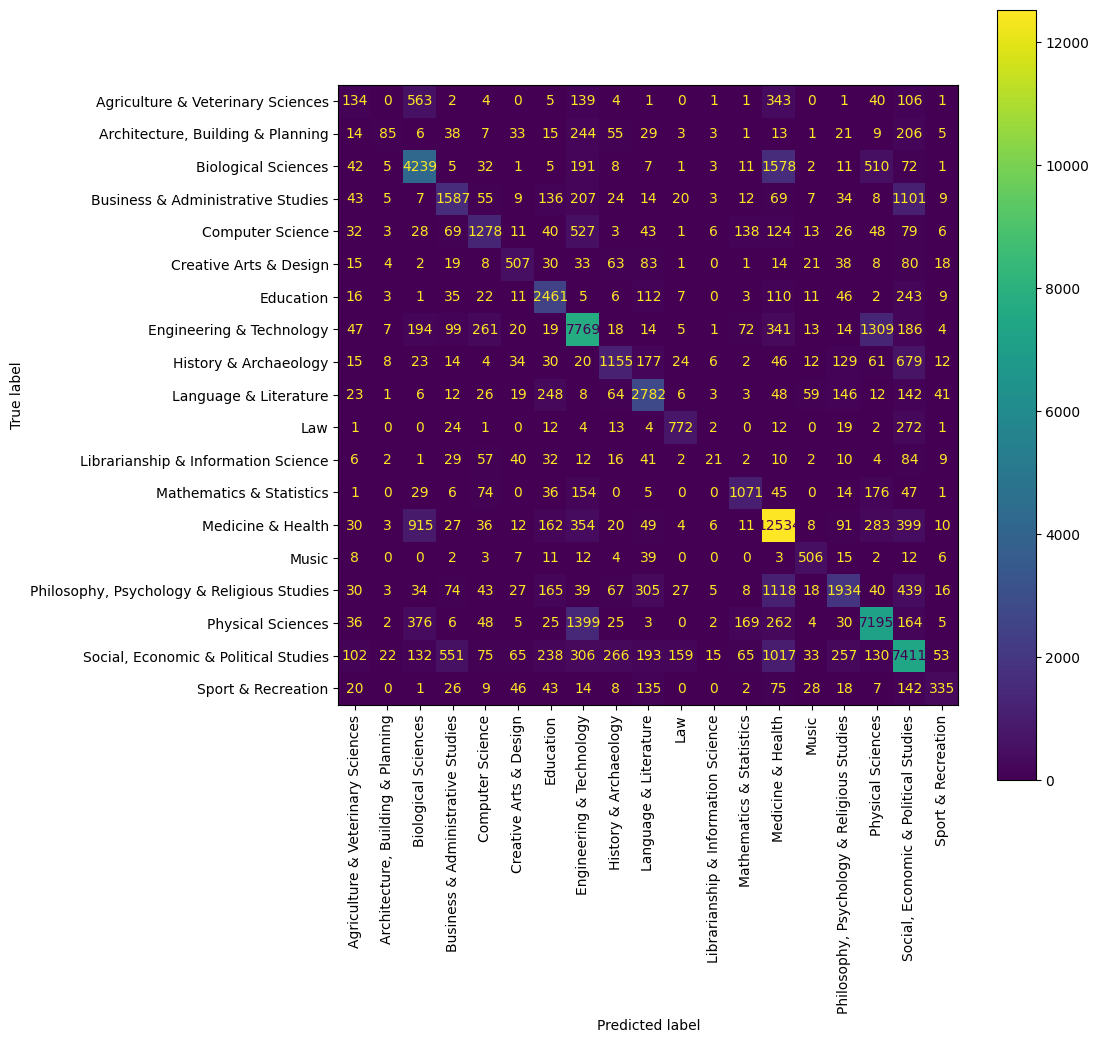

In [17]:
from sklearn.linear_model import SGDClassifier

# training a linear SVM classifier
svm_model_linear = SGDClassifier(loss='hinge',
                                 penalty='l2',
                                 alpha=1e-3,
                                 random_state=seed, 
                                 tol=None).fit(X_train, y_train)

# model accuracy for X_test
print(f"Accuracy: {svm_model_linear.score(X_test, y_test)}")

# creating a confusion matrix
plot_confusion_matrix(predictions = svm_model_linear.predict(X_test),
                      true = y_test,
                      label_names = subjects)

## Logistic regression

/Users/rchan/opt/miniconda3/envs/ethosTDSenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6774197574002895


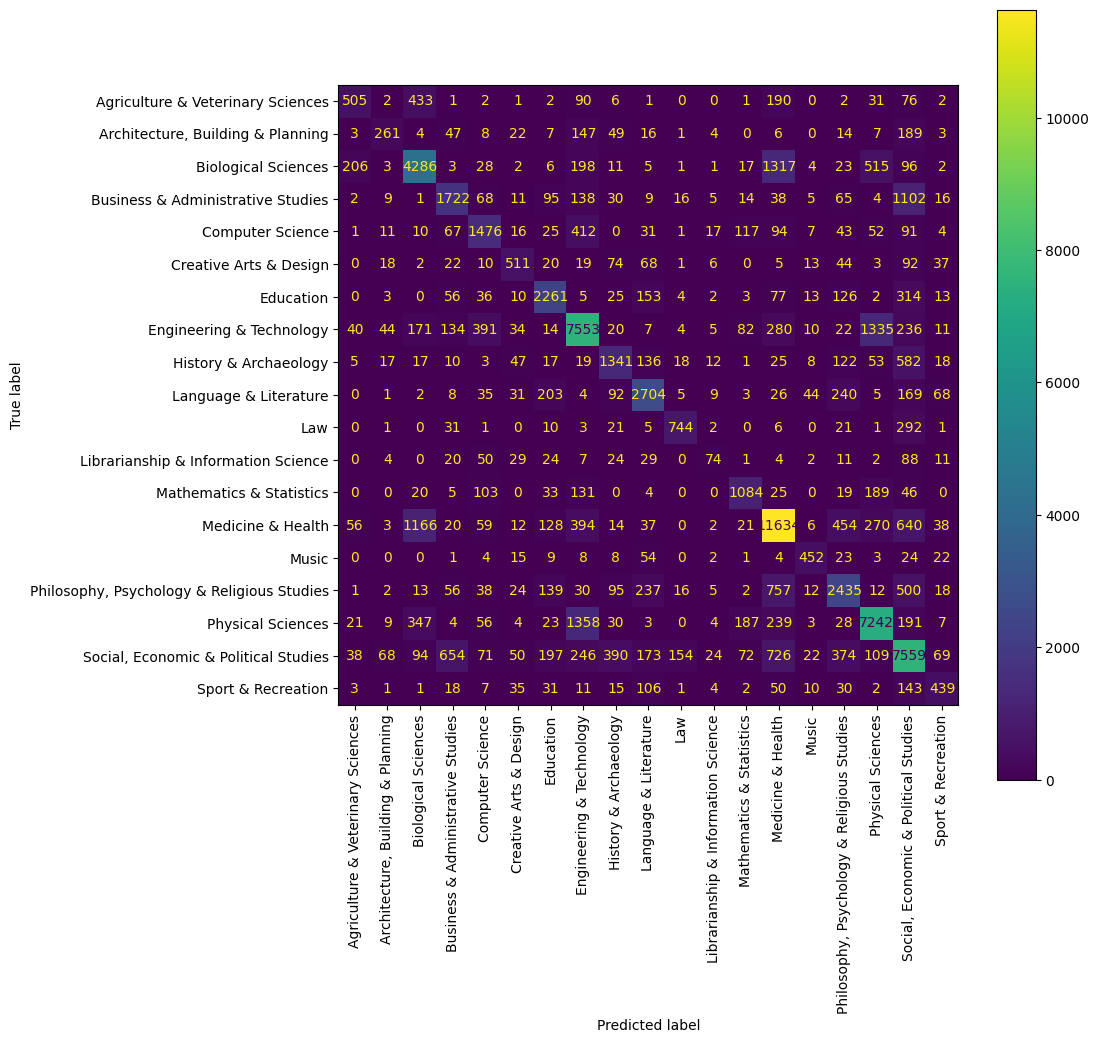

In [18]:
from sklearn.linear_model import LogisticRegression

# training a logistic regression classifier
log_reg_model_linear = LogisticRegression(penalty='l2',
                                          random_state=seed,
                                          max_iter=500,
                                          multi_class="multinomial").fit(X_train, y_train)

# model accuracy for X_test
print(f"Accuracy: {log_reg_model_linear.score(X_test, y_test)}")

# creating a confusion matrix
plot_confusion_matrix(predictions = log_reg_model_linear.predict(X_test),
                      true = y_test,
                      label_names = subjects)

## Logistic regression - binary for each class

/Users/rchan/opt/miniconda3/envs/ethosTDSenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6801153097389308


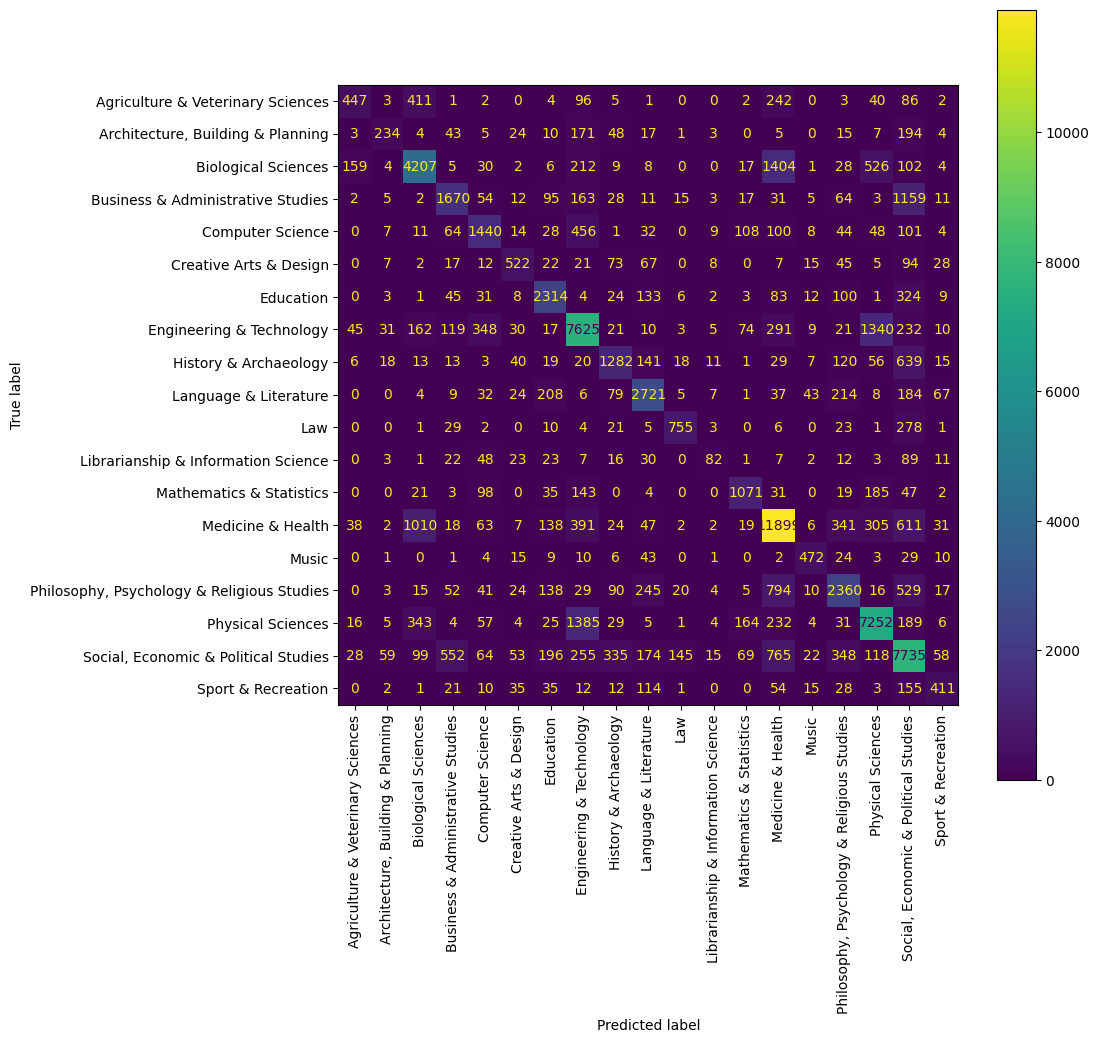

In [19]:
from sklearn.linear_model import LogisticRegression

# training a logistic regression classifier
log_reg_model_linear_2 = LogisticRegression(penalty='l2',
                                            random_state=seed,
                                            max_iter=200,
                                            multi_class="ovr").fit(X_train, y_train)

# model accuracy for X_test
print(f"Accuracy: {log_reg_model_linear_2.score(X_test, y_test)}")

# creating a confusion matrix
plot_confusion_matrix(predictions = log_reg_model_linear_2.predict(X_test),
                      true = y_test,
                      label_names = subjects)

## KNN

Accuracy: 0.5884914890430789


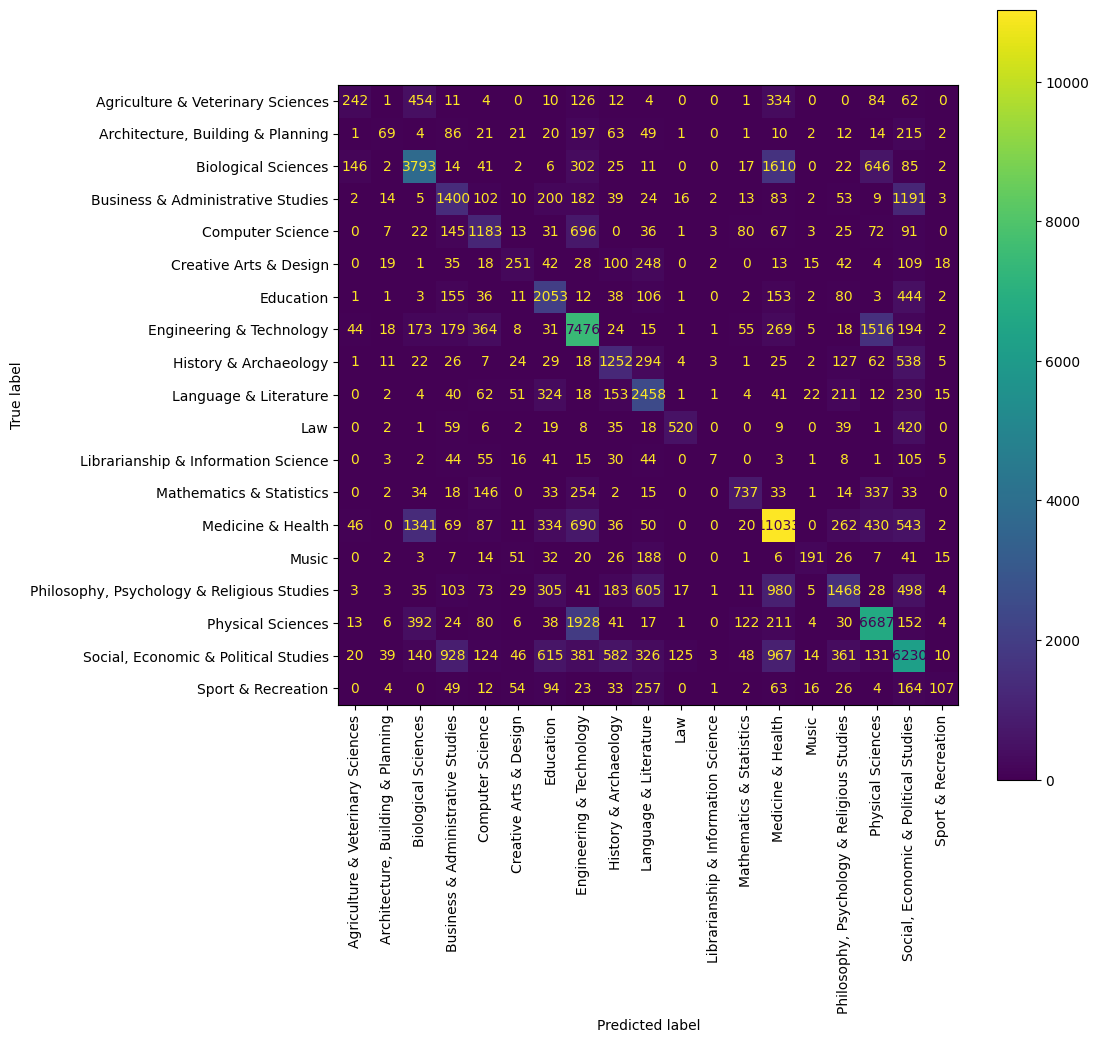

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# training a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train)
  
# model accuracy for X_test
print(f"Accuracy: {knn.score(X_test, y_test)}")

# creating a confusion matrix
plot_confusion_matrix(predictions = knn.predict(X_test),
                      true = y_test,
                      label_names = subjects)

## Neural Network

In [80]:
import torch
import torch.nn as nn
from pytorch_utils import KFolds, set_seed, training_pytorch, testing_pytorch, KFold_pytorch
from ffn import FeedforwardNeuralNetModel

In [81]:
input_dim = abstract_embeddings.shape[1]
hidden_dim = 200
output_dim = len(subjects)
dropout_rate = 0.5
num_epochs = 1000
batch_size = 2048
learning_rate = 0.005
n_folds = 4
patience = 10

In [82]:
abstract_embeddings = torch.Tensor(abstract_embeddings)
label_index = torch.Tensor(label_index).long()

In [83]:
abstract_embeddings

tensor([[-2.7399,  0.2318, -1.4535,  ..., -2.2523, -1.8559,  0.9382],
        [-2.3384,  0.4235, -1.8972,  ..., -2.2543, -1.6631,  1.0495],
        [-2.4162, -0.6490, -1.6762,  ..., -1.6958, -1.2410,  0.5759],
        ...,
        [-1.7920,  0.0197, -1.8172,  ..., -1.6666, -2.6103,  1.5612],
        [-2.1140, -0.6222, -0.6320,  ..., -2.9730, -1.7714,  1.3285],
        [-2.3003, -0.6933,  0.1387,  ..., -2.8931, -2.2084,  0.0583]])

In [84]:
label_index

tensor([ 7, 16, 13,  ..., 15, 13, 15])

In [85]:
# initial model definitions
model = FeedforwardNeuralNetModel(input_dim,
                                  hidden_dim,
                                  output_dim,
                                  dropout_rate)
criterion = nn.CrossEntropyLoss() # cross-entropy for creating confident models
# criterion = nn.NLLLoss() # negative log likelihood for multi-class classification
optimizer = torch.optim.Adam(model.parameters(),
                             lr = learning_rate)

In [86]:
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import TensorDataset

train_index, test_index, _, _ = train_test_split(range(len(label_index)),
                                                 label_index,
                                                 random_state = seed)
train_index, valid_index = train_test_split(train_index,
                                            test_size=0.33,
                                            random_state = seed)

x_train = abstract_embeddings[train_index]
y_train = label_index[train_index]
x_valid = abstract_embeddings[valid_index]
y_valid = label_index[valid_index]
x_test = abstract_embeddings[test_index]
y_test = label_index[test_index]

train = TensorDataset(x_train, y_train)
valid = TensorDataset(x_valid, y_valid)
test = TensorDataset(x_test, y_test)

train_loader = DataLoader(dataset=train, batch_size=batch_size)
valid_loader = DataLoader(dataset=valid, batch_size=batch_size)
test_loader = DataLoader(dataset=test, batch_size=batch_size)

In [87]:
model = training_pytorch(model=model,
                         train_loader=train_loader,
                         valid_loader=valid_loader,
                         criterion=criterion,
                         optimizer=optimizer,
                         num_epochs=num_epochs,
                         seed=seed,
                         patience=patience,
                         verbose=True,
                         verbose_epoch=100,
                         verbose_item=100000)

  0%|                                                                                                              | 0/1000 [00:00<?, ?it/s]

Epoch: 1/1000 || Item: 0/79 || Loss: 3.01162052154541
--------------------------------------------------
##### Epoch: 1/1000 || Loss: 1.4898239374160767
--------------------------------------------------


  0%|                                                                                                      | 1/1000 [00:02<35:46,  2.15s/it]

Epoch: 1 || Loss: 1.3794988363217084 || Accuracy: 0.5409486889839172 || F1-score: 0.2866472569290785.


 10%|██████████                                                                                          | 100/1000 [03:00<21:17,  1.42s/it]

Epoch: 101/1000 || Item: 0/79 || Loss: 0.7916332483291626
--------------------------------------------------
##### Epoch: 101/1000 || Loss: 0.7876650094985962
--------------------------------------------------


 10%|██████████                                                                                          | 101/1000 [03:01<20:34,  1.37s/it]

Epoch: 101 || Loss: 0.9325933425854414 || Accuracy: 0.6844108700752258 || F1-score: 0.6127807294007767.


 20%|████████████████████                                                                                | 200/1000 [05:17<17:54,  1.34s/it]

Epoch: 201/1000 || Item: 0/79 || Loss: 0.800872802734375
--------------------------------------------------
##### Epoch: 201/1000 || Loss: 0.7569975852966309
--------------------------------------------------


 20%|████████████████████                                                                                | 201/1000 [05:18<18:15,  1.37s/it]

Epoch: 201 || Loss: 0.9926424332154102 || Accuracy: 0.6733181476593018 || F1-score: 0.5874514408135171.


 30%|██████████████████████████████                                                                      | 300/1000 [07:30<15:27,  1.32s/it]

Epoch: 301/1000 || Item: 0/79 || Loss: 0.7806780934333801
--------------------------------------------------
##### Epoch: 301/1000 || Loss: 0.7318369150161743
--------------------------------------------------


 30%|██████████████████████████████                                                                      | 301/1000 [07:31<15:11,  1.30s/it]

Epoch: 301 || Loss: 1.0190223394296107 || Accuracy: 0.6764316558837891 || F1-score: 0.6027312603624836.


 40%|████████████████████████████████████████                                                            | 400/1000 [09:43<13:06,  1.31s/it]

Epoch: 401/1000 || Item: 0/79 || Loss: 0.7932189106941223
--------------------------------------------------
##### Epoch: 401/1000 || Loss: 0.7333585619926453
--------------------------------------------------


 40%|████████████████████████████████████████                                                            | 401/1000 [09:45<13:19,  1.33s/it]

Epoch: 401 || Loss: 1.0287639987774384 || Accuracy: 0.6720197796821594 || F1-score: 0.6042566552622951.


 50%|██████████████████████████████████████████████████                                                  | 500/1000 [11:56<10:59,  1.32s/it]

Epoch: 501/1000 || Item: 0/79 || Loss: 0.7867922186851501
--------------------------------------------------
##### Epoch: 501/1000 || Loss: 0.7405654191970825
--------------------------------------------------


 50%|██████████████████████████████████████████████████                                                  | 501/1000 [11:57<10:47,  1.30s/it]

Epoch: 501 || Loss: 1.0998883369641426 || Accuracy: 0.6676709055900574 || F1-score: 0.5892186534620188.


 60%|████████████████████████████████████████████████████████████                                        | 600/1000 [14:09<08:48,  1.32s/it]

Epoch: 601/1000 || Item: 0/79 || Loss: 0.7611883282661438
--------------------------------------------------
##### Epoch: 601/1000 || Loss: 0.7115282416343689
--------------------------------------------------


 60%|████████████████████████████████████████████████████████████                                        | 601/1000 [14:10<08:55,  1.34s/it]

Epoch: 601 || Loss: 1.0854467443930798 || Accuracy: 0.6728895306587219 || F1-score: 0.5981165216087232.


 70%|██████████████████████████████████████████████████████████████████████                              | 700/1000 [17:37<33:04,  6.62s/it]

Epoch: 701/1000 || Item: 0/79 || Loss: 0.7434918880462646
--------------------------------------------------
##### Epoch: 701/1000 || Loss: 0.6966466903686523
--------------------------------------------------


 70%|██████████████████████████████████████████████████████████████████████                              | 701/1000 [17:46<35:39,  7.15s/it]

Epoch: 701 || Loss: 1.1166620437915509 || Accuracy: 0.6688179969787598 || F1-score: 0.5974022940653377.


 80%|████████████████████████████████████████████████████████████████████████████████                    | 800/1000 [24:42<04:19,  1.30s/it]

Epoch: 801/1000 || Item: 0/79 || Loss: 0.7434998154640198
--------------------------------------------------
##### Epoch: 801/1000 || Loss: 0.7188829779624939
--------------------------------------------------


 80%|████████████████████████████████████████████████████████████████████████████████                    | 801/1000 [24:43<04:22,  1.32s/it]

Epoch: 801 || Loss: 1.1524722239910028 || Accuracy: 0.6641917824745178 || F1-score: 0.5815747721997964.


 90%|██████████████████████████████████████████████████████████████████████████████████████████          | 900/1000 [26:52<02:11,  1.31s/it]

Epoch: 901/1000 || Item: 0/79 || Loss: 0.7394216060638428
--------------------------------------------------
##### Epoch: 901/1000 || Loss: 0.7143250107765198
--------------------------------------------------


 90%|██████████████████████████████████████████████████████████████████████████████████████████          | 901/1000 [26:53<02:07,  1.29s/it]

Epoch: 901 || Loss: 1.1369956303865483 || Accuracy: 0.6737719178199768 || F1-score: 0.5945229177036798.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [29:02<00:00,  1.74s/it]


Accuracy: 0.6675360798835754


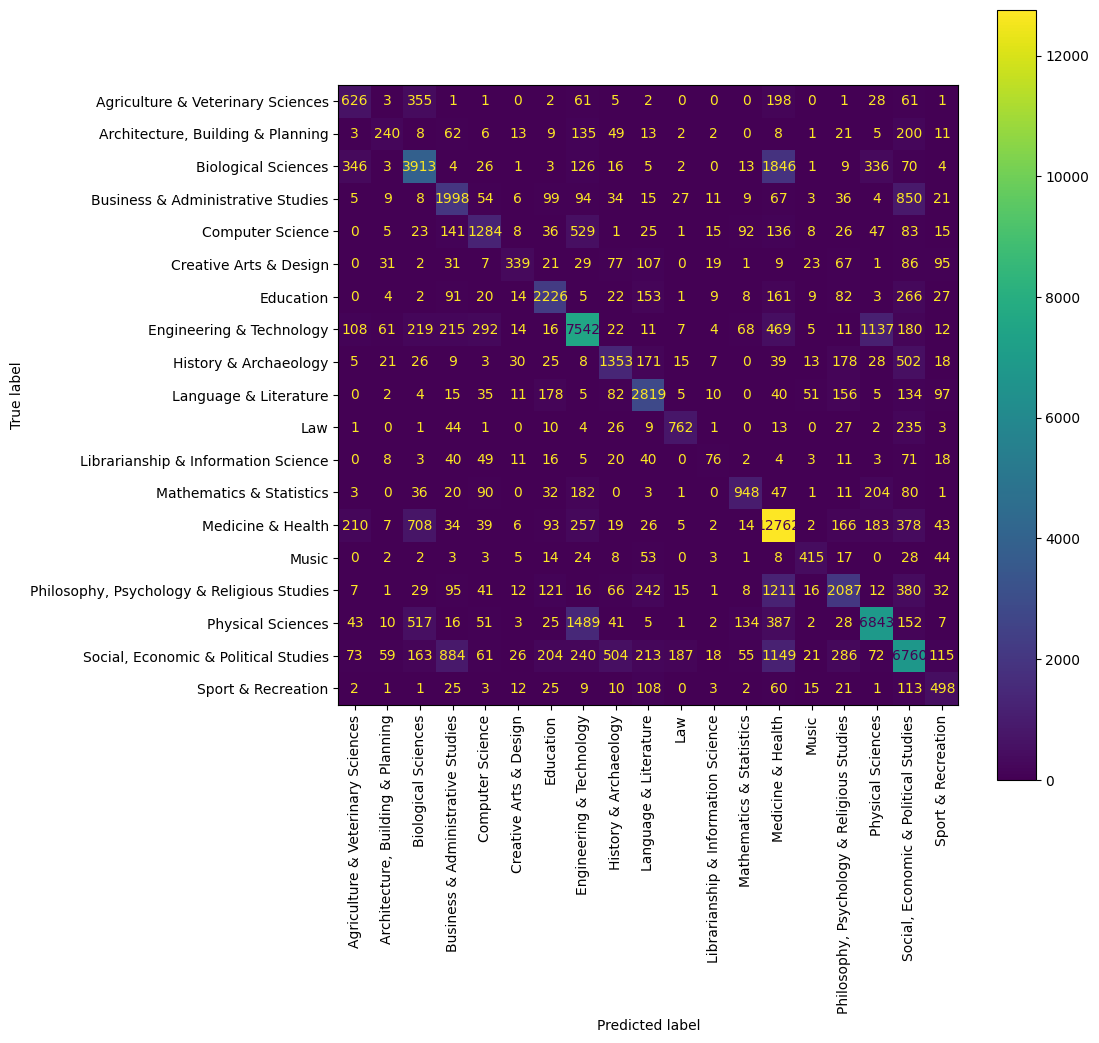

In [88]:
predicted, _ = testing_pytorch(model, test_loader)

# model accuracy for X_test
print(f"Accuracy: {((predicted == y_test).sum() / len(y_test)).item()}")

# creating a confusion matrix
plot_confusion_matrix(predictions = predicted,
                      true = y_test,
                      label_names = subjects)

In [89]:
# batch=128, lr=0.005: 0.66
# batch=256, lr=0.005: 0.66
# batch=2048, lr=0.005: 0.66

# batch=128, lr=0.001: 
# batch=128, lr=0.0005: 
# batch=128, lr=0.0001: 
# batch=128, lr=0.00005: 
# batch=128, lr=0.00001: 

# batch=256, lr=0.001: 
# batch=256, lr=0.0005: 
# batch=256, lr=0.0001: 
# batch=256, lr=0.00005: 
# batch=256, lr=0.00001: 

## KFold evaluation

In [158]:
data_folds = KFolds(x_data = abstract_embeddings,
                    y_data = label_index,
                    n_splits = n_folds,
                    shuffle = True,
                    random_state = seed,
                    data_f)

In [47]:
# initial model definitions
model = FeedforwardNeuralNetModel(input_dim,
                                  hidden_dim,
                                  output_dim,
                                  dropout_rate)
criterion = nn.CrossEntropyLoss() # cross-entropy for creating confident models
# criterion = nn.NLLLoss() # negative log likelihood for multi-class classification
optimizer = torch.optim.Adam(model.parameters(),
                             lr = learning_rate)

In [159]:
kfold_eval = KFold_pytorch(data_folds,
                           model = model,
                           criterion = criterion,
                           optimizer = optimizer,
                           num_epochs = num_epochs,
                           verbose_args = {
                               "verbose": True,
                               "verbose_epoch": 10,
                               "verbose_item": 100000
                           })

  0%|                                         | 0/4 [00:00<?, ?it/s]


**************************************************
Fold: 1 / 4
**************************************************
torch.LongTensor



  0%|                                       | 0/100 [00:00<?, ?it/s]

Epoch: 1/100 || Item: 0/161064 || Loss: 2.0353517532348633


  0%|                                         | 0/4 [00:02<?, ?it/s]


KeyboardInterrupt: 